In [1]:
import os
base_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
os.chdir(base_dir)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import lane_detection
import utils

%matplotlib inline

In [2]:
image_folder_name = 'test_image'

In [3]:
image_paths = utils.get_list_of_input_files(image_folder_name, "jpg")
images = [cv2.imread(image_path) for image_path in image_paths]

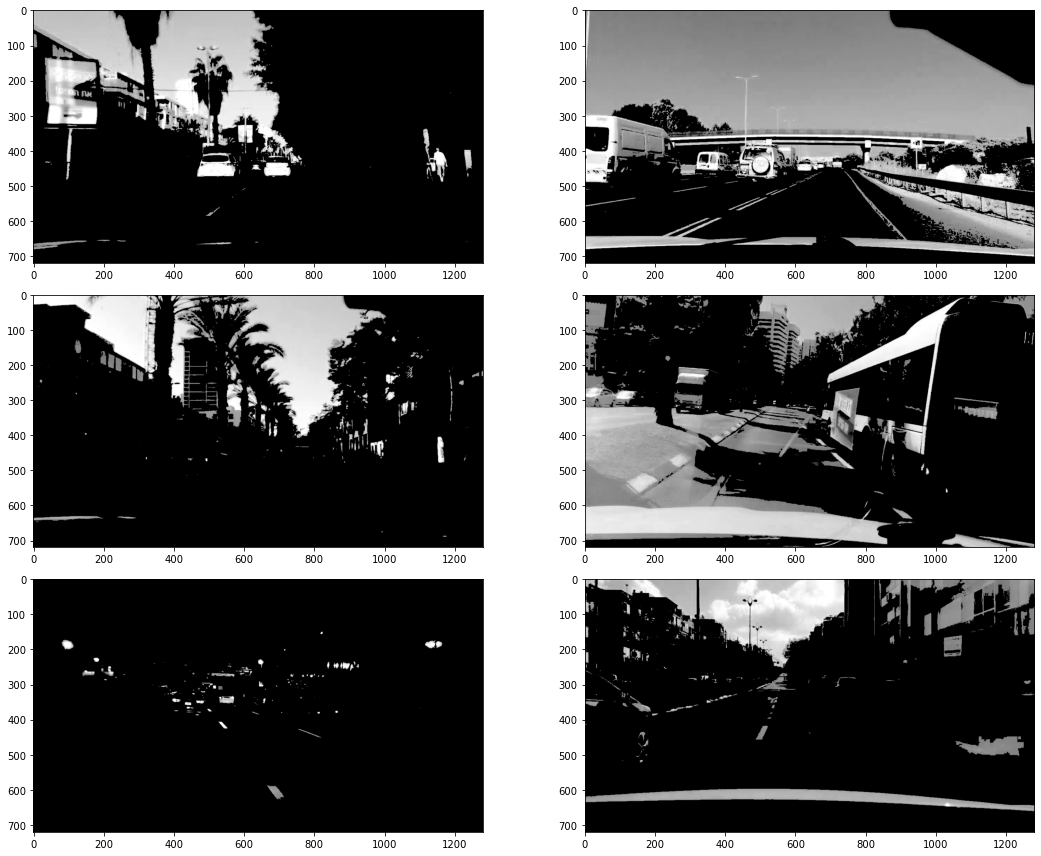

In [8]:
def create_channel_mask(channel, threshold):
    return cv2.inRange(channel, threshold[0], threshold[1])

def bgr_to_hls(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2HLS)

def create_hls_lane_mask(frame):
    # Select channel lightness
    hls_frame = bgr_to_hls(frame)
    mask = create_channel_mask(hls_frame[:, :, 1], (125, 255))
    return cv2.bitwise_and(frame[:, :, 2], frame[:, :, 2], mask=mask)

lanes = list(map(create_hls_lane_mask, images))
utils.show_images(lanes)

<H3>Edge Detection<H3>

In [9]:
def apply_gaussian_blur(frame, kernel=(5, 5)):
    return cv2.GaussianBlur(frame, kernel, 0)

def bgr_to_gray(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
def apply_sobel_edge_detection(frame):
    #frame = bgr_to_gray(frame)
    frame = apply_gaussian_blur(frame)
    
    # For x direction
    sobel_x = cv2.Sobel(frame, cv2.CV_64F, 1, 0)
    # For y direction
    sobel_y = cv2.Sobel(frame, cv2.CV_64F, 0, 1)
    # Calculate filtered matrix
    grad = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    return (grad * 255 / grad.max()).astype(np.uint8)

def apply_canny_edge_det(frame, thresholds=(30, 150)):
    #gray  = bgr_to_gray(frame)
    frame = apply_gaussian_blur(frame)
    return cv2.Canny(frame, thresholds[0], thresholds[1])

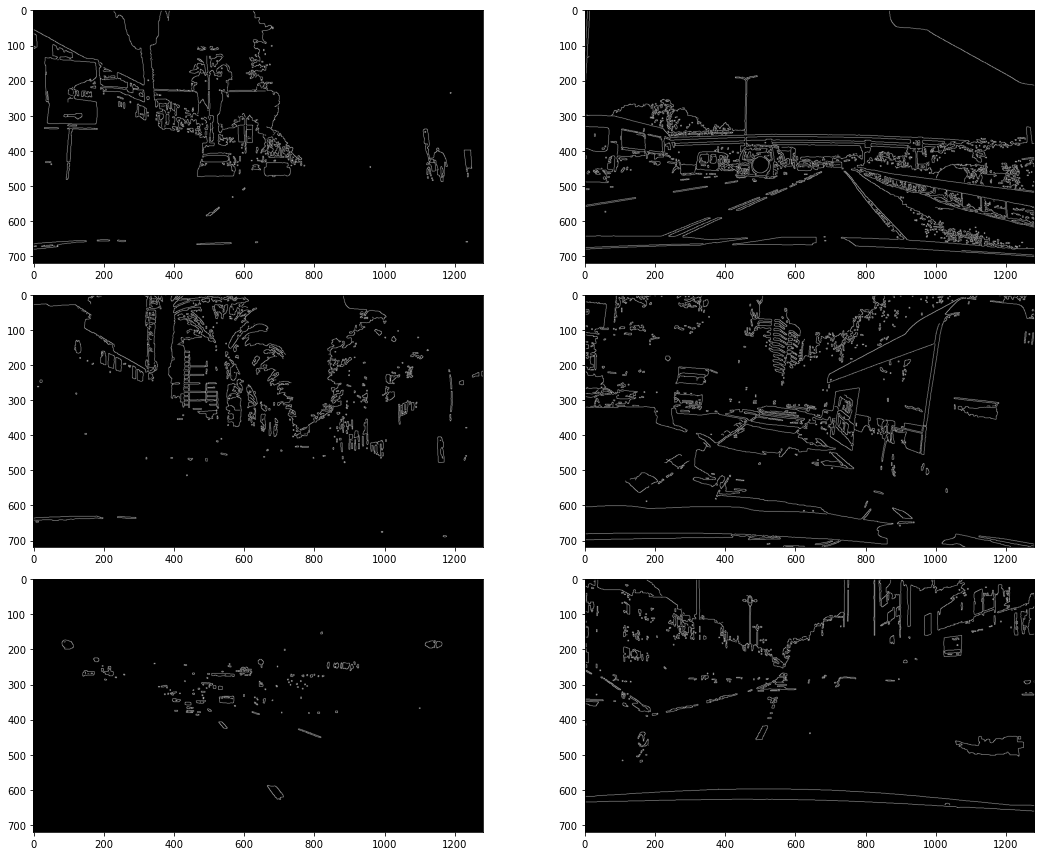

In [10]:
utils.show_images(list(map(apply_canny_edge_det, lanes)))

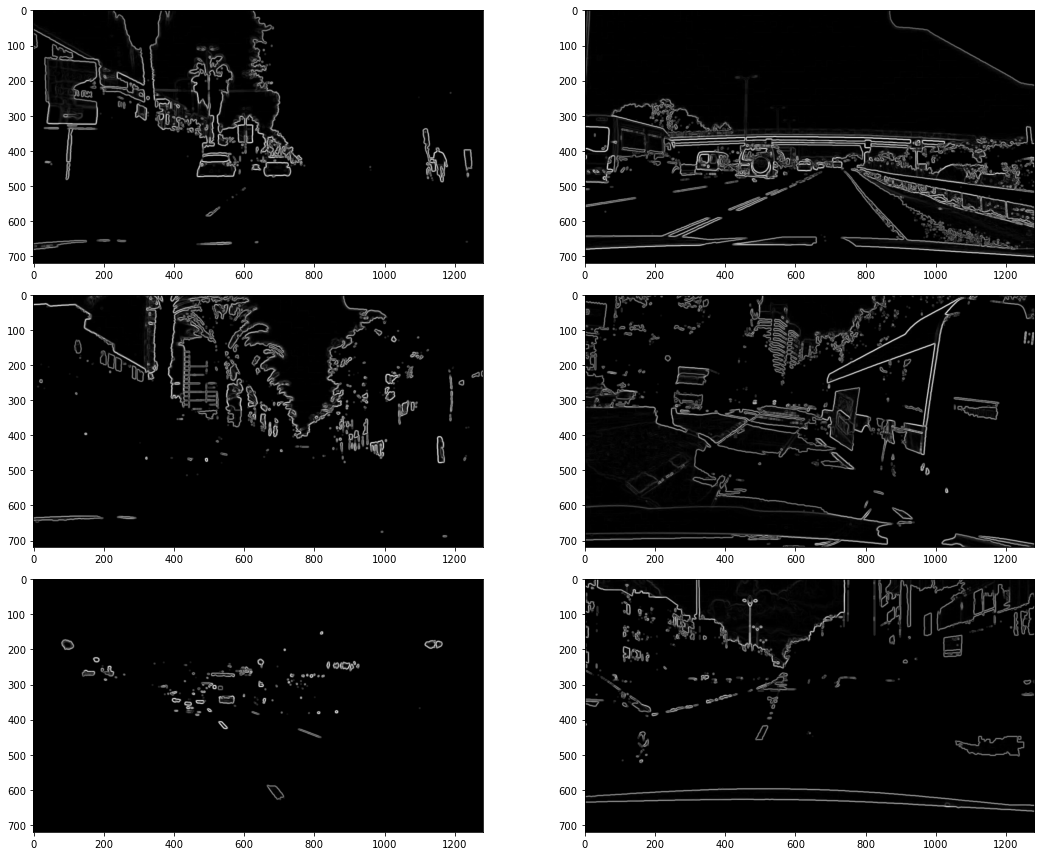

In [11]:
edges = list(map(apply_sobel_edge_detection, lanes))
utils.show_images(edges)

In [ ]:
#def combine_edge_lane():
#    return cv2.bitwise_and(lanes, edges)

#utils.show_images(list(map(apply_canny_edge_det, images)))

In [ ]:
Todo Tranform, Draw lines